In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [6]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [7]:
x_train = train_datagen.flow_from_directory(r"D:\Assigment3\Flowers-Dataset\flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [8]:
x_test = test_datagen.flow_from_directory(r"D:\Assigment3\Flowers-Dataset\flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [9]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [11]:
model=Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [14]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 81s 436ms/step - loss: 1.2654 - accuracy: 0.4793 - val_loss: 1.0839 - val_accuracy: 0.5722
Epoch 2/10
180/180 [==============================] - 73s 404ms/step - loss: 1.0454 - accuracy: 0.5891 - val_loss: 1.1640 - val_accuracy: 0.5515
Epoch 3/10
180/180 [==============================] - 69s 385ms/step - loss: 0.9922 - accuracy: 0.6095 - val_loss: 1.0843 - val_accuracy: 0.5821
Epoch 4/10
180/180 [==============================] - 64s 356ms/step - loss: 0.9442 - accuracy: 0.6294 - val_loss: 0.9484 - val_accuracy: 0.6224
Epoch 5/10
180/180 [==============================] - 48s 270ms/step - loss: 0.8931 - accuracy: 0.6523 - val_loss: 0.8600 - val_accuracy: 0.6669
Epoch 6/10
180/180 [==============================] - 47s 263ms/step - loss: 0.8679 - accuracy: 0.6569 - val_loss: 0.8445 - val_accuracy: 0.6697
Epoch 7/10
180/180 [==============================] - 48s 268ms/step - loss: 0.8110 - accuracy: 0.6924 - val_loss: 0.8006 - val_ac

In [16]:
model.save('IBM_flowers.h5')

In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [18]:
model=load_model('IBM_flowers.h5')

In [19]:
img=image.load_img(r'D:\Assigment3\Flowers-Dataset\flowers\sunflower/200557979_a16112aac1_n.jpg')

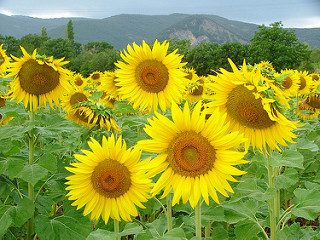

In [20]:
img

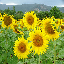

In [21]:
img=image.load_img(r'D:\Assigment3\Flowers-Dataset\flowers\sunflower/200557979_a16112aac1_n.jpg',target_size=(64,64))
img

In [22]:
x=image.img_to_array(img)
x

array([[[170., 196., 223.],
        [185., 210., 232.],
        [188., 215., 232.],
        ...,
        [151., 183., 208.],
        [137., 169., 192.],
        [125., 155., 179.]],

       [[182., 207., 227.],
        [188., 216., 228.],
        [193., 216., 230.],
        ...,
        [162., 194., 217.],
        [153., 183., 207.],
        [143., 171., 195.]],

       [[208., 225., 235.],
        [206., 219., 228.],
        [198., 214., 229.],
        ...,
        [173., 203., 227.],
        [165., 197., 218.],
        [156., 186., 210.]],

       ...,

       [[ 86., 135.,  43.],
        [ 57., 101.,  16.],
        [ 37.,  66.,  22.],
        ...,
        [ 97., 141.,  54.],
        [ 92., 156.,  44.],
        [ 56., 116.,   3.]],

       [[ 71., 109.,  32.],
        [ 42.,  79.,  27.],
        [106., 146.,  86.],
        ...,
        [111., 146., 104.],
        [ 92., 136.,  61.],
        [140., 181., 121.]],

       [[ 41.,  80.,  13.],
        [ 40.,  81.,  11.],
        [ 45.,  

In [23]:
x=np.expand_dims(x,axis=0)
x

array([[[[170., 196., 223.],
         [185., 210., 232.],
         [188., 215., 232.],
         ...,
         [151., 183., 208.],
         [137., 169., 192.],
         [125., 155., 179.]],

        [[182., 207., 227.],
         [188., 216., 228.],
         [193., 216., 230.],
         ...,
         [162., 194., 217.],
         [153., 183., 207.],
         [143., 171., 195.]],

        [[208., 225., 235.],
         [206., 219., 228.],
         [198., 214., 229.],
         ...,
         [173., 203., 227.],
         [165., 197., 218.],
         [156., 186., 210.]],

        ...,

        [[ 86., 135.,  43.],
         [ 57., 101.,  16.],
         [ 37.,  66.,  22.],
         ...,
         [ 97., 141.,  54.],
         [ 92., 156.,  44.],
         [ 56., 116.,   3.]],

        [[ 71., 109.,  32.],
         [ 42.,  79.,  27.],
         [106., 146.,  86.],
         ...,
         [111., 146., 104.],
         [ 92., 136.,  61.],
         [140., 181., 121.]],

        [[ 41.,  80.,  13.],
       

In [24]:
y=np.argmax(model.predict(x),axis=1)
y

1/1 [==============================] - 0s 176ms/step


array([3], dtype=int64)

In [25]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [27]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [28]:
index[y[0]]

'sunflower'